In [16]:
import sys
import os
from PIL import Image, ImageDraw
import pathlib
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append(pathlib.Path(os.getcwd(), 'facenet_pytorch').as_posix())

In [4]:
from facenet_pytorch import MTCNN

In [10]:
from utils import resize, rotate_image

In [11]:
MAX_WIDTH = 500
MAX_HEIGHT = 500
image_path = 'assets/hard_me_viji.JPG'

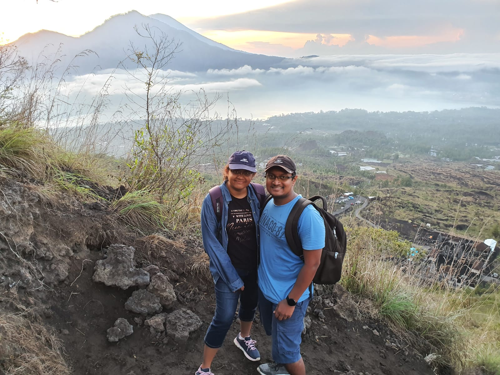

In [51]:
img = Image.open(image_path)
ratio, img = resize(img, MAX_HEIGHT, MAX_WIDTH)
display(img)

In [52]:
mtcnn = MTCNN(select_largest=False, keep_all=True, post_process=False, device='cuda:0')

In [59]:
boxes, probs = mtcnn.detect(np.array(img.convert('RGB')))
print(boxes)
print(probs)

[[267.5871  168.8912  290.47977 195.04288]
 [230.27997 166.03545 250.49365 188.01491]]
[0.99999225 0.9977132 ]


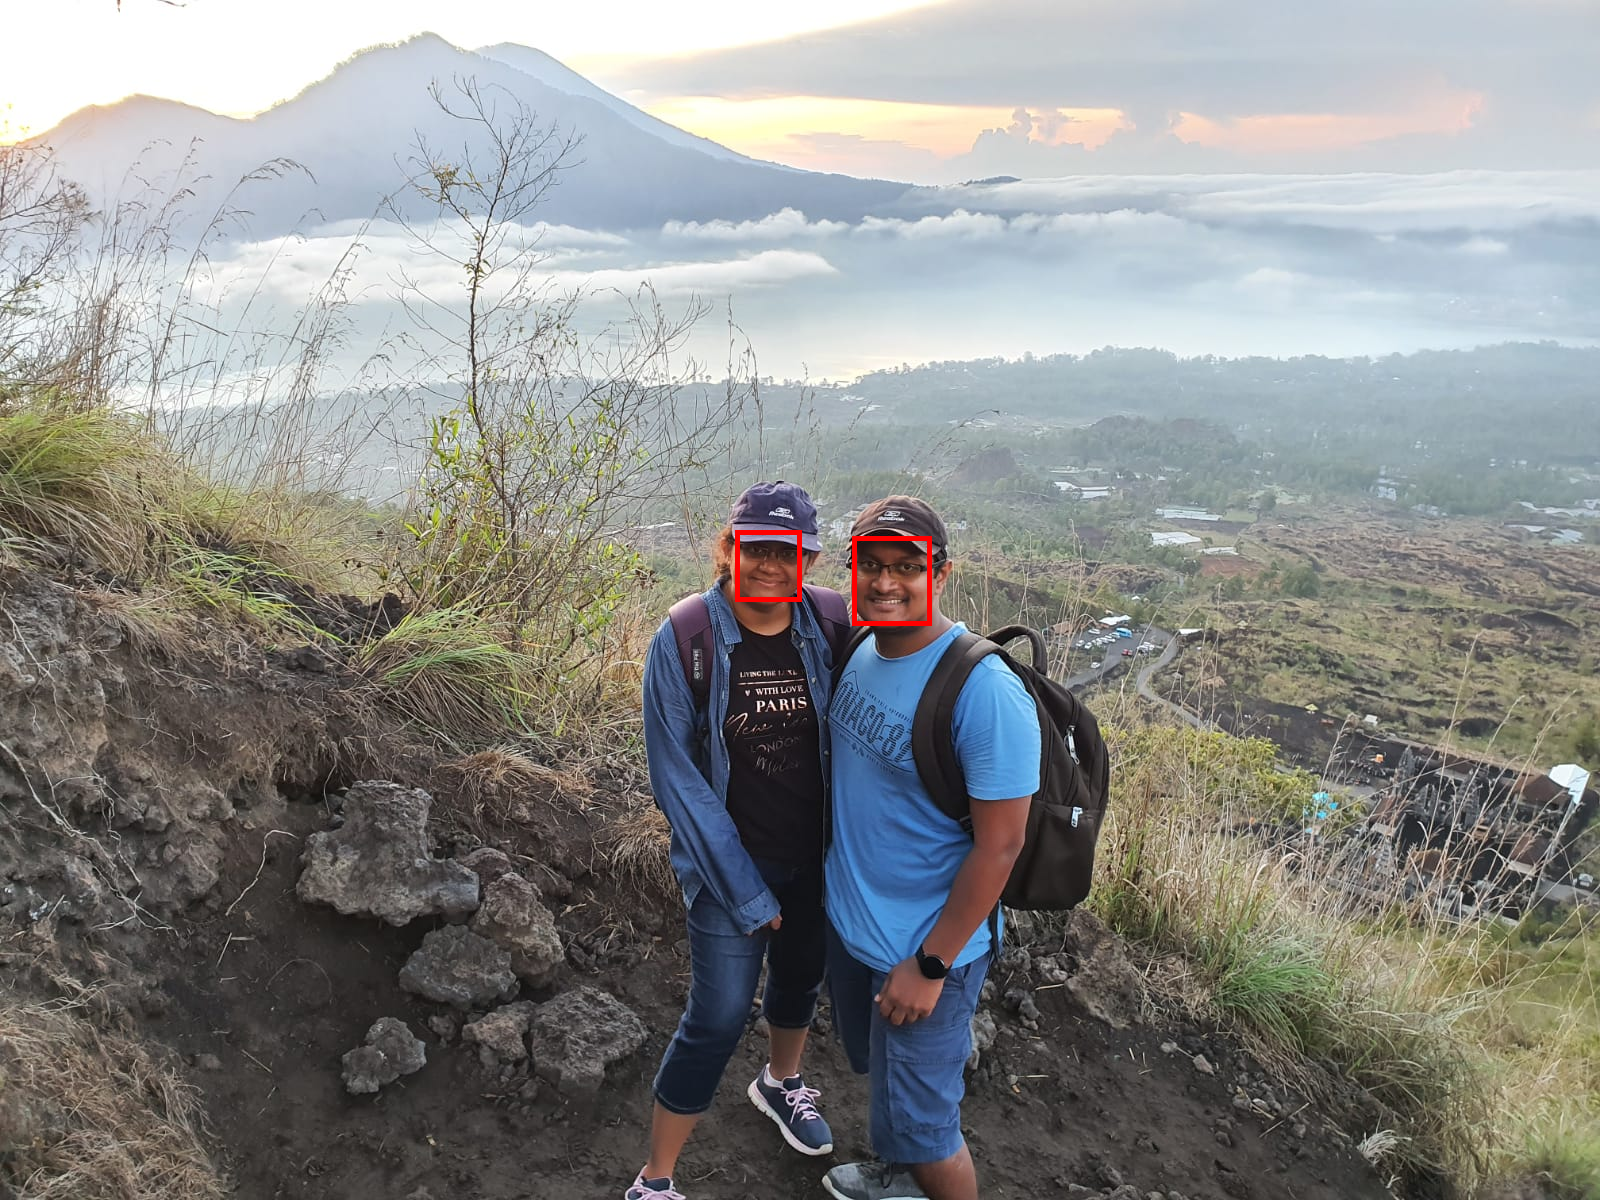

In [70]:
img_copy = Image.open(image_path)
# ratio_copy, img_copy = resize(img_copy, MAX_HEIGHT, MAX_WIDTH)
boxes, probs = mtcnn.detect(np.array(img_copy.convert('RGB')))
img_boxed = ImageDraw.Draw(img_copy)

for (left, top, right, bottom) in boxes:
    img_boxed = ImageDraw.Draw(img_copy) 
    shape = [left, top, right, bottom]
    img_boxed.rectangle(shape, outline="red", width=5)
    # break
display(img_copy)

In [46]:
arr

array([[[139, 119, 118],
        [139, 119, 118],
        [123, 102,  99],
        ...,
        [ 71,  64,  71],
        [ 69,  62,  69],
        [ 69,  62,  69]],

       [[129, 109, 107],
        [129, 109, 107],
        [111,  90,  86],
        ...,
        [ 72,  66,  72],
        [ 70,  62,  70],
        [ 70,  62,  70]],

       [[ 88,  69,  65],
        [ 88,  69,  65],
        [ 64,  40,  36],
        ...,
        [ 79,  72,  79],
        [ 72,  65,  72],
        [ 72,  65,  72]],

       ...,

       [[133, 128, 134],
        [133, 128, 134],
        [141, 137, 138],
        ...,
        [144,  95,  88],
        [147, 102,  96],
        [147, 102,  96]],

       [[125, 121, 130],
        [125, 121, 130],
        [108, 106, 110],
        ...,
        [146,  97,  90],
        [148, 103,  97],
        [148, 103,  97]],

       [[123, 120, 129],
        [123, 120, 129],
        [101,  99, 104],
        ...,
        [147,  98,  91],
        [148, 103,  97],
        [148, 103,  97]]

## Face detection is pretty good. Subjects to parameter tuning. MTCNN of DeepFace performed slighly differently. So I used RetinaFace, which had good sensitivity.